In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [5]:
df=pd.read_csv("/content/Heart disease prediction.csv")

In [6]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
df.shape

(270, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [10]:
#Checking for Duplicates
df.duplicated().sum()

0

In [11]:
#Checking for null values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [25]:
# Mapping numeric values to non-numeric values

df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

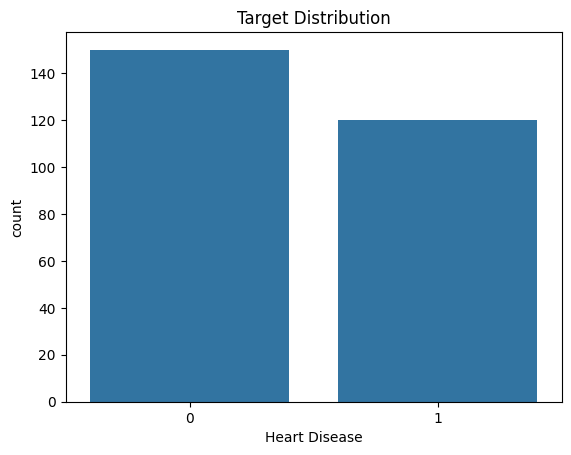

In [26]:
#Let's check the distributaion of Target variable.
sns.countplot(x='Heart Disease', data=df,)
plt.title('Target Distribution');

In [27]:
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

<Axes: >

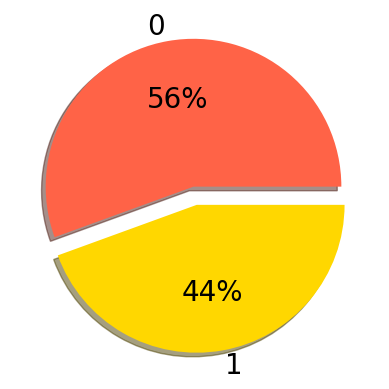

In [28]:
df.groupby('Heart Disease').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%',explode=[0.05,0.075],shadow=True,
                                  colors=['tomato', 'gold', 'skyblue'])

In [29]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['Heart Disease'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

In [30]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<Axes: xlabel='Age'>

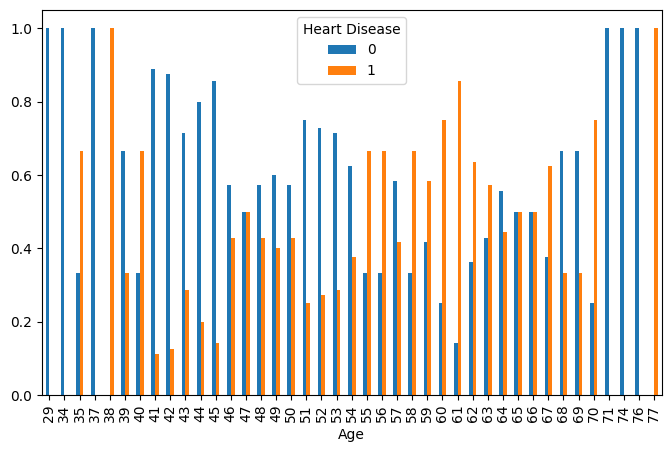

In [31]:
plot('Age')

<Axes: xlabel='Sex'>

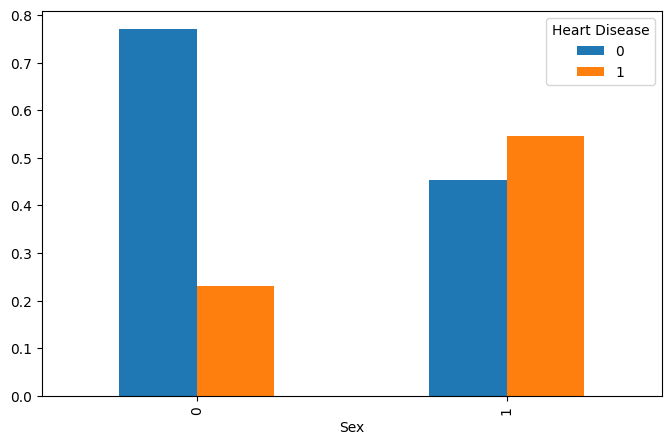

In [32]:
plot('Sex')

<Axes: xlabel='Chest pain type'>

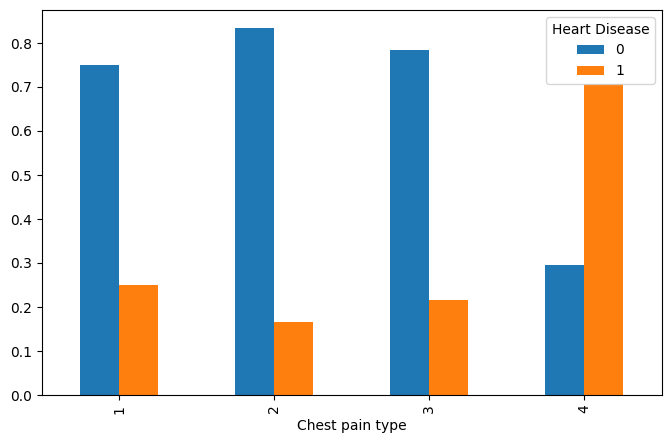

In [33]:
plot('Chest pain type')

<Axes: xlabel='BP'>

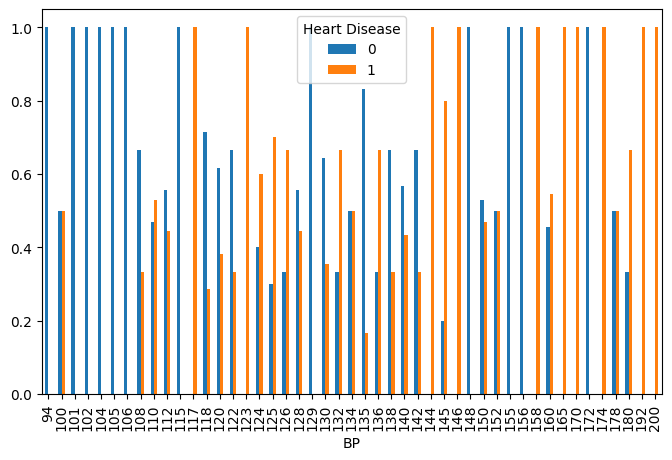

In [34]:
plot('BP')

<Axes: xlabel='Cholesterol'>

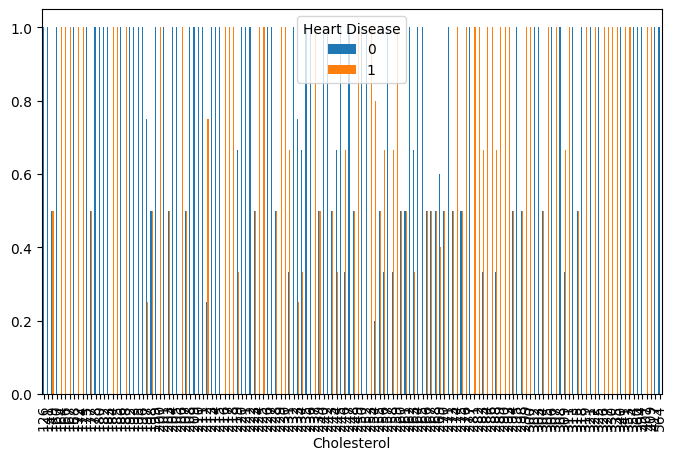

In [35]:
plot('Cholesterol')

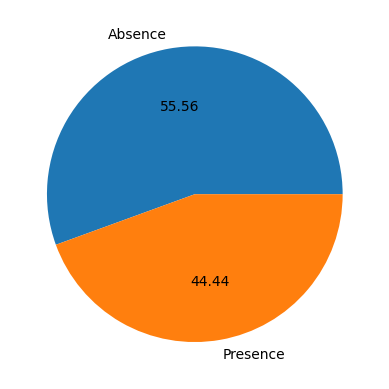

In [36]:
plt.pie(df['Heart Disease'].value_counts(),labels=['Absence','Presence'],autopct="%0.2f")
plt.show()

In [37]:
#Finding Correlation
cn=df.corr()
cn

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


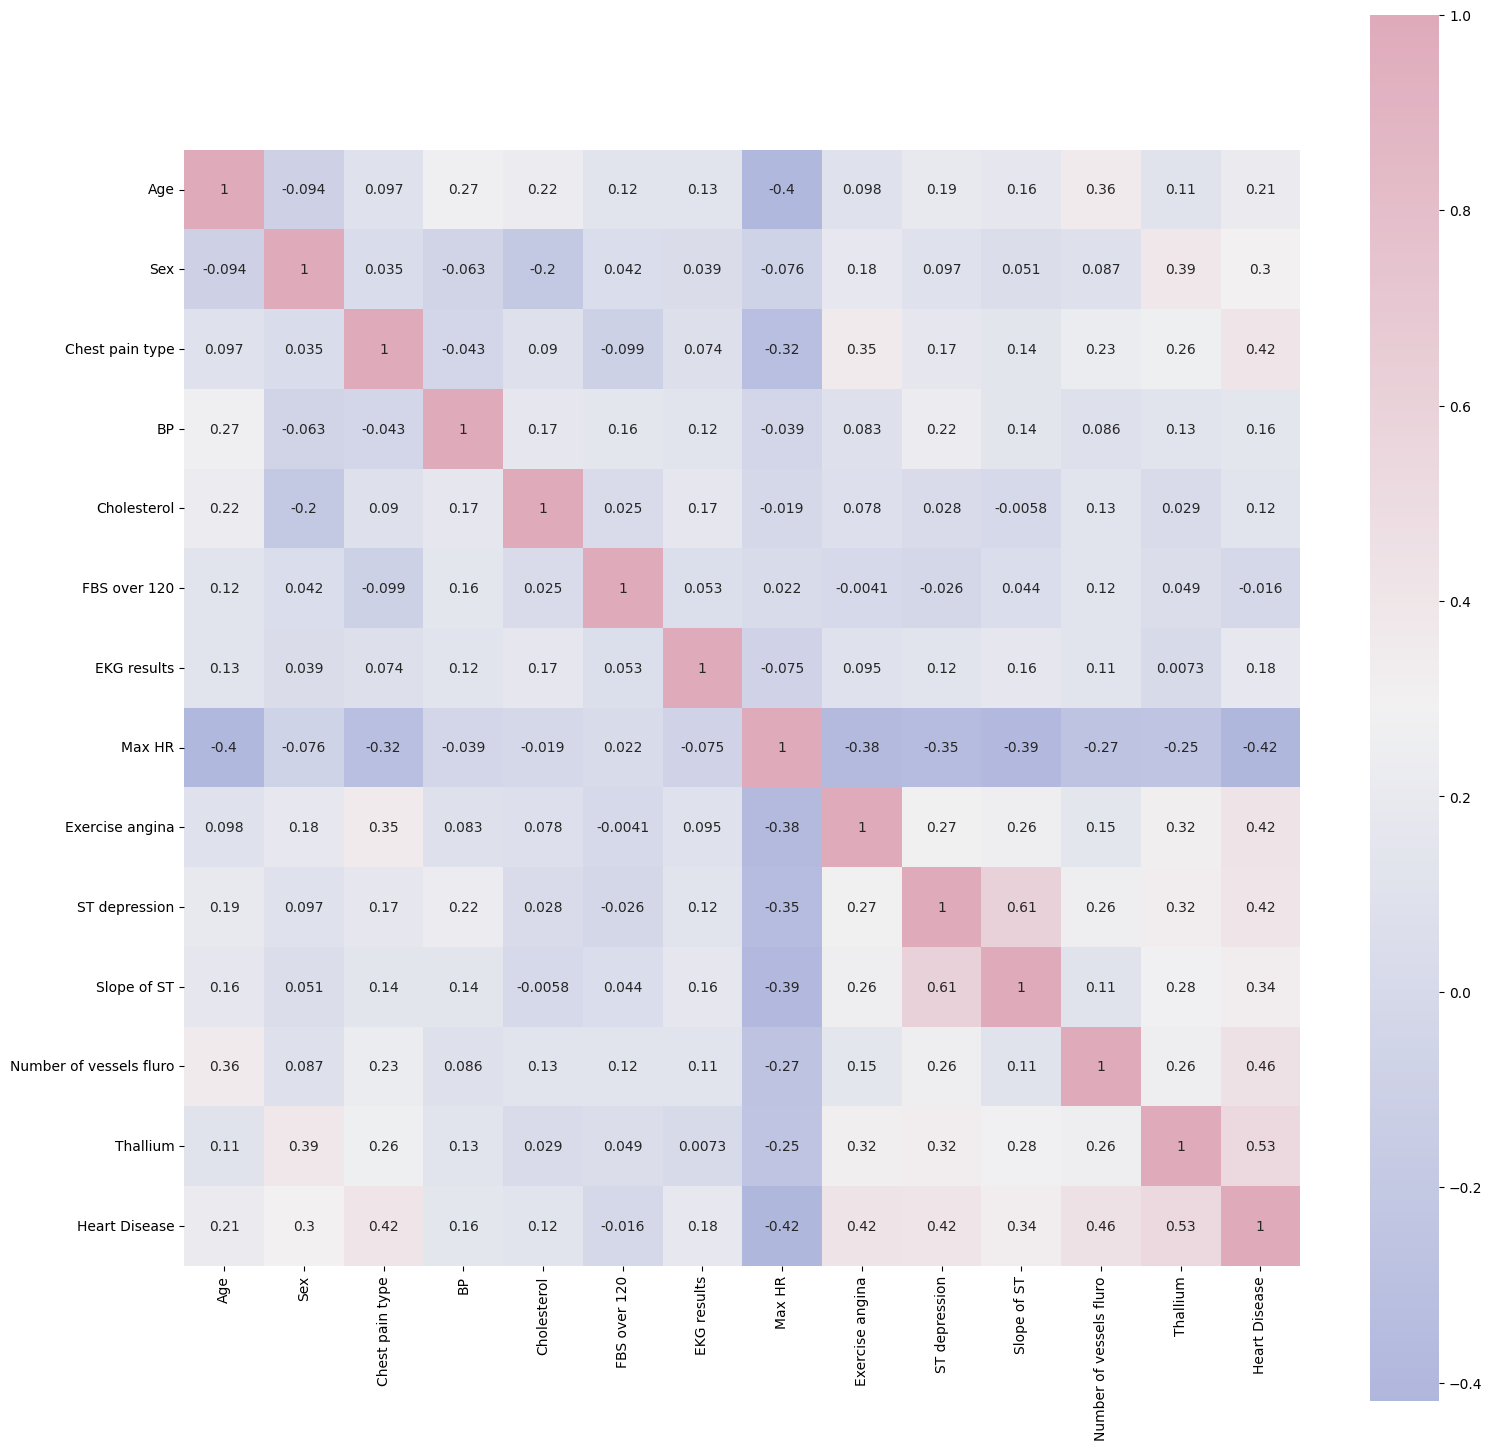

In [38]:
#Correlation
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [39]:
#Splitting independent and dependent variables
x = df.drop('Heart Disease', axis = 1)
y = df['Heart Disease']

In [47]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [48]:
#Fitting training data to the model by Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
#Predicting result using testing data
preds= dt_model.predict(x_test)
preds

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1])

In [50]:
#Model accuracy
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_test, preds)
accuracy

0.7333333333333333

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred=rf_model.predict(x_test)
rf_accur=accuracy_score(y_test, rf_pred)
rf_accur

0.8444444444444444

In [58]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=13,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(4,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid'))

In [59]:
 #Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# Fit the model
history = model.fit(x, y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6891 - accuracy: 0.5556 - val_loss: 0.6838 - val_accuracy: 0.5889
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6901 - accuracy: 0.5389 - val_loss: 0.6850 - val_accuracy: 0.5778
Epoch 3/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6886 - accuracy: 0.5556 - val_loss: 0.6830 - val_accuracy: 0.5889
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6880 - accuracy: 0.5500 - val_loss: 0.6831 - val_accuracy: 0.5889
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 0.6896 - accuracy: 0.5444 - val_loss: 0.6843 - val_accuracy: 0.5778
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 0.6885 - accuracy: 0.5556 - val_loss: 0.6823 - val_accuracy: 0.5889
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 0.6878 - accuracy: 0.5556 - val_loss: 0.6820 - val_accuracy: 0.5889
Epoch 

In [62]:
# evaluate the model
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8296
accuracy: 82.96%


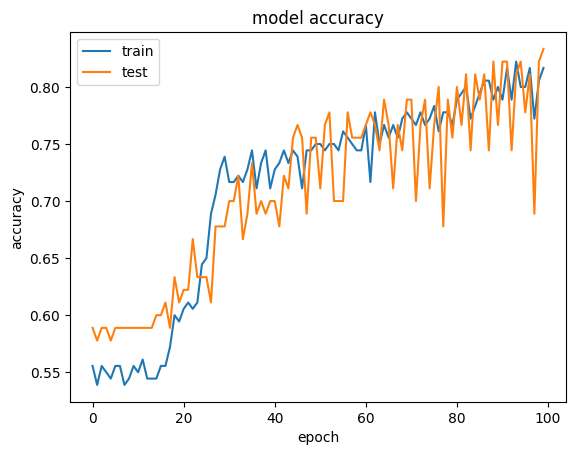

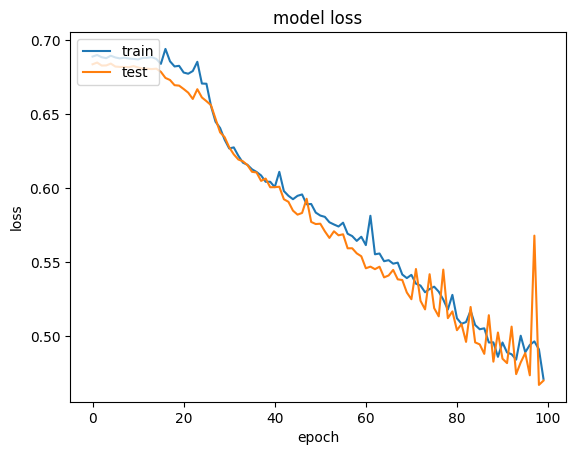

In [63]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()